In [17]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Dense, Input, LSTM, Bidirectional, Conv1D
from tensorflow.keras.layers import Dropout, Embedding
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from tensorflow.keras.models import Model
import tensorflow

import pandas as pd
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from numpy import array
from numpy import asarray
from numpy import zeros
import pickle

In [2]:

df = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_train_dataset.csv')
df.head(10)

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
5,5,w53495 w306061 w372126 w47982 w66980 w189406 w...,1,0,0,0,1
6,6,w237465 w256553 w286461 w382662 w206066 w12125...,1,0,0,1,0
7,7,w173317 w39222 w207614 w136665 w394246 w197783...,1,1,1,0,0
8,8,w373517 w37419 w358253 w162965 w286461 w204762...,1,0,0,0,0
9,9,w230409 w109269 w369689 w186076 w377961 w21787...,1,1,0,0,0


In [3]:
df_labels = df[["outwear", "top", "trousers", "women dresses", "women skirts"]]
df_labels.head()

,outwear,top,trousers,women dresses,women skirts
0,1,0,1,0,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


In [4]:
X = list(df["word_representation"])
y = df_labels.values
print(X[1])
print( type(X))
print(len(X[2]))
banlist=[]
mod_X = []
for sen in X:
    tmp = sen.split(" ")
    ans = [x for x in tmp if x not in banlist]
    mod_sen = (" ").join(ans)
    mod_X.append(mod_sen)

print(mod_X[1])
print(type(X[1]))

w195317 w127737 w171593 w22890 w342007 w217871 w289824 w500005 w85858 w241910 w194870 w192814 w127834 w263923 w241910
<class 'list'>
162
w195317 w127737 w171593 w22890 w342007 w217871 w289824 w500005 w85858 w241910 w194870 w192814 w127834 w263923 w241910
<class 'str'>


In [5]:
def find_max_list(list):
    list_len = [len(i) for i in list]
    print(max(list_len))

#print output#
find_max_list(mod_X)



365


In [6]:
df_val = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_test_dataset.csv')
df_val.head(10)
X_val=df_val['word_representation'].values
print(type(X_val))

<class 'numpy.ndarray'>


In [7]:
print(len(X[2]))

162


In [8]:
#why fix num words
tokenizer = Tokenizer(num_words=4250)
tokenizer.fit_on_texts(mod_X)

mod_X = tokenizer.texts_to_sequences(mod_X)
X_val = tokenizer.texts_to_sequences(X_val)

vocab_size = len(tokenizer.word_index) + 1
#what is max len
maxlen = 24
pre_pad_X = mod_X
mod_X = pad_sequences(mod_X, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
print(mod_X[5:20])
#print(type(mod_X[1]))

[[ 489  534  158  535    9   88  207    3  211  315  439  209    3 3028
  1300   11  709   39   44  107  662    0    0    0]
 [  32   27   10  159  873   28  934  143  727   49   89  327    8    0
     0    0    0    0    0    0    0    0    0    0]
 [  79  403  394    3  395  396   16    1  389   64  387    5  397    1
   404   35   56    4   51  309  141   92 1064   17]
 [  24   83  405   98   10   30  953  954  870   14  288   29    4  377
   980  904  175  173    0    0    0    0    0    0]
 [ 122 1252 1964  104   35   20   22  244  164  490  536   39  406  559
     3  232   68    1   59   14  968  404   35   29]
 [ 710  745  799    9  125  369  163   19  185  746   54  132  560  309
   994 3029   21   15   20    0    0    0    0    0]
 [ 899 2355   89   18   69   84    3  269  510   16  170   55  287  469
   129    6    0    0    0    0    0    0    0    0]
 [  44  398   68  174  995   25    7   64  871   21  830  874    0    0
     0    0    0    0    0    0    0    0    0    0]


In [9]:
all_lens = []
for i in range(7380):
    all_lens.append(len(pre_pad_X[i]))

# for line in mod_X:
#     i = len(line)
#     all_lens.append(i)
# plt.bar(range(360), all_lens)

In [10]:
#print(all_lens)
print(max(all_lens))
print(min(all_lens))
print(len(all_lens))

47
8
7380


In [11]:
type(all_lens)
dflens = pd.DataFrame(all_lens,columns=['Lengths'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCD1D508D0>]],
      dtype=object)

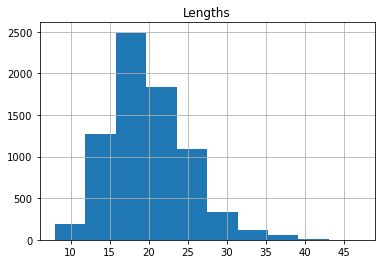

In [12]:
dflens.hist()

In [13]:
print(X_val[1])
embeddings_dictionary = pd.read_pickle("word_embeddings.pkl")

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
#    if word in banlist:
#        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None :
        embedding_matrix[index] = embedding_vector
print(type(embedding_matrix))
print(len(embedding_matrix))

[  32  337   99    2  175  814 2679   81    7  553  234    1  601  152
  229  120   77  103   29    0    0    0    0    0]
<class 'numpy.ndarray'>
4250


In [14]:
#old model 
#from tensorflow.keras.layers import Bidirectional
# model = Sequential()
# #model.add(tensorflow.keras.Input(shape=(maxlen,)))
# model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False, input_shape=(maxlen,)))
# model.add(Bidirectional(LSTM(132, return_sequences=False),merge_mode="concat"))
# model.add(Dropout(0.2))
# # model.add(Dense(units=50))
# model.add(Dense(units=5))
# model.add(Activation('sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [32]:
inp = Input(shape=(maxlen,))
#all drop out rates used to be .10 lower, with only 10 epochs)
x = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=True)(inp)
x = SpatialDropout1D(0.45)(x)

x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.25, recurrent_dropout=0.25))(x)
x = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x)

#avg_pool = GlobalAveragePooling1D()(x)
#max_pool = GlobalMaxPooling1D()(x)
#x = concatenate([avg_pool, max_pool])
x = GlobalAveragePooling1D()(x)
out = Dense(5, activation='sigmoid')(x)
model = Model(inp, out)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(mod_X, y, batch_size=160, epochs=20, verbose=1, validation_split=0.4)

Epoch 1/20
28/28 [==============================] - 3s 125ms/step - loss: 0.0360 - accuracy: 0.5264 - val_loss: 0.0759 - val_accuracy: 0.5017
Epoch 2/20
28/28 [==============================] - 4s 127ms/step - loss: 0.0317 - accuracy: 0.5357 - val_loss: 0.0752 - val_accuracy: 0.4929
Epoch 3/20
28/28 [==============================] - 4s 133ms/step - loss: 0.0295 - accuracy: 0.5108 - val_loss: 0.0752 - val_accuracy: 0.4949
Epoch 4/20
28/28 [==============================] - 4s 130ms/step - loss: 0.0300 - accuracy: 0.5183 - val_loss: 0.0753 - val_accuracy: 0.5064
Epoch 5/20
28/28 [==============================] - 4s 133ms/step - loss: 0.0284 - accuracy: 0.5303 - val_loss: 0.0785 - val_accuracy: 0.4685
Epoch 6/20
28/28 [==============================] - 4s 125ms/step - loss: 0.0253 - accuracy: 0.5106 - val_loss: 0.0786 - val_accuracy: 0.4827
Epoch 7/20
28/28 [==============================] - 3s 124ms/step - loss: 0.0281 - accuracy: 0.5215 - val_loss: 0.0802 - val_accuracy: 0.4390
Epoch 

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

KeyError: 'acc'

In [41]:
preds_val = model.predict(X_val, verbose = 1)
preds_val[preds_val>=0.5] = 1
preds_val[preds_val<0.5] = 0

print(preds_val)
type(preds_val[1,1])

77/77 [==============================] - 1s 7ms/step
[[0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 ...
 [1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]


numpy.float32

In [42]:
preds_val_df=pd.DataFrame(data=preds_val, columns = ["outwear","top","trousers","women dresses","women skirts"])
preds_val_df.index.name = "id"

print(preds_val_df)
preds_val_df = preds_val_df.astype(int)
preds_val_df.dtypes

      outwear  top  trousers  women dresses  women skirts
id                                                       
0         0.0  1.0       1.0            0.0           0.0
1         1.0  1.0       0.0            0.0           0.0
2         1.0  0.0       1.0            0.0           0.0
3         0.0  1.0       1.0            0.0           0.0
4         0.0  1.0       1.0            0.0           0.0
...       ...  ...       ...            ...           ...
2455      0.0  0.0       1.0            1.0           0.0
2456      1.0  0.0       1.0            0.0           0.0
2457      1.0  0.0       1.0            0.0           0.0
2458      1.0  1.0       1.0            0.0           0.0
2459      0.0  0.0       1.0            0.0           1.0

[2460 rows x 5 columns]


outwear          int32
top              int32
trousers         int32
women dresses    int32
women skirts     int32
dtype: object

In [43]:
preds_val_df.to_csv("way2manyepochs.csv")